Beates Quandl Test
==========
This is my test for quandl data import and using some ML stuff on the time serie  
Using this website https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/


In [39]:
import quandl
quandl.ApiConfig.api_key = "ktBYxHoMYu9JsBZJiKUe"
import numpy as np
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

## using Airbus stock from Börse Frankfurt

In [40]:
airbusstock = quandl.get("FSE/AIR_X",column_index='Close')

In [41]:
airbusstock.head()

,Close
Date,
2000-07-10,17.25
2000-07-11,18.20
2000-07-12,18.49
2000-07-13,18.10
2000-07-14,18.10


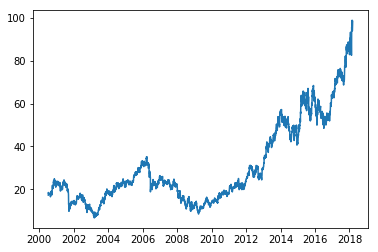

In [42]:
plt.plot(airbusstock)

In [43]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [44]:
airbusset = airbusstock.values
airbusset = airbusset.astype('float32')

In [45]:
train_size = int(len(airbusset) * 0.67)
test_size = len(airbusset) - train_size
train, test = airbusset[0:train_size,:], airbusset[train_size:len(airbusset),:]
print(len(train), len(test))

3055 1505


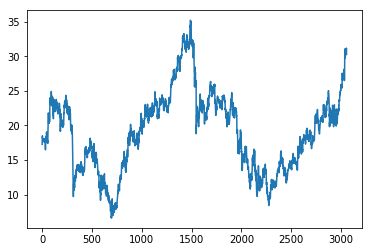

In [46]:
plt.plot(train)

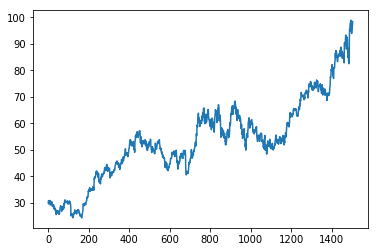

In [47]:
plt.plot(test)

In [48]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [62]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainY.shape

(3051,)

In [63]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
 - 2s - loss: 5.9651
Epoch 2/400
 - 2s - loss: 0.2229
Epoch 3/400
 - 2s - loss: 0.2376
Epoch 4/400
 - 2s - loss: 0.2382
Epoch 5/400
 - 2s - loss: 0.2371
Epoch 6/400
 - 2s - loss: 0.2446
Epoch 7/400
 - 3s - loss: 0.2392
Epoch 8/400
 - 3s - loss: 0.2404
Epoch 9/400
 - 4s - loss: 0.2352
Epoch 10/400
 - 3s - loss: 0.2365
Epoch 11/400
 - 2s - loss: 0.2295
Epoch 12/400
 - 3s - loss: 0.2335
Epoch 13/400
 - 4s - loss: 0.2305
Epoch 14/400
 - 2s - loss: 0.2354
Epoch 15/400
 - 5s - loss: 0.2286
Epoch 16/400
 - 2s - loss: 0.2355
Epoch 17/400
 - 3s - loss: 0.2331
Epoch 18/400
 - 3s - loss: 0.2293
Epoch 19/400
 - 5s - loss: 0.2339
Epoch 20/400
 - 6s - loss: 0.2271
Epoch 21/400
 - 5s - loss: 0.2348
Epoch 22/400
 - 4s - loss: 0.2300
Epoch 23/400
 - 5s - loss: 0.2274
Epoch 24/400
 - 3s - loss: 0.2245
Epoch 25/400
 - 3s - loss: 0.2360
Epoch 26/400
 - 3s - loss: 0.2274
Epoch 27/400
 - 3s - loss: 0.2338
Epoch 28/400
 - 3s - loss: 0.2303
Epoch 29/400
 - 2s - loss: 0.2343
Epoch 30/400
 - 3s - lo

 - 2s - loss: 0.2227
Epoch 239/400
 - 2s - loss: 0.2267
Epoch 240/400
 - 3s - loss: 0.2254
Epoch 241/400
 - 2s - loss: 0.2245
Epoch 242/400
 - 2s - loss: 0.2288
Epoch 243/400
 - 2s - loss: 0.2221
Epoch 244/400
 - 2s - loss: 0.2249
Epoch 245/400
 - 3s - loss: 0.2257
Epoch 246/400
 - 2s - loss: 0.2257
Epoch 247/400
 - 2s - loss: 0.2270
Epoch 248/400
 - 2s - loss: 0.2201
Epoch 249/400
 - 2s - loss: 0.2225
Epoch 250/400
 - 2s - loss: 0.2313
Epoch 251/400
 - 2s - loss: 0.2212
Epoch 252/400
 - 2s - loss: 0.2238
Epoch 253/400
 - 2s - loss: 0.2241
Epoch 254/400
 - 2s - loss: 0.2268
Epoch 255/400
 - 3s - loss: 0.2238
Epoch 256/400
 - 2s - loss: 0.2225
Epoch 257/400
 - 2s - loss: 0.2271
Epoch 258/400
 - 2s - loss: 0.2227
Epoch 259/400
 - 2s - loss: 0.2296
Epoch 260/400
 - 3s - loss: 0.2227
Epoch 261/400
 - 3s - loss: 0.2214
Epoch 262/400
 - 2s - loss: 0.2235
Epoch 263/400
 - 2s - loss: 0.2242
Epoch 264/400
 - 2s - loss: 0.2267
Epoch 265/400
 - 2s - loss: 0.2257
Epoch 266/400
 - 3s - loss: 0.2233

In [64]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

Train Score: 0.21 MSE (0.46 RMSE)
Test Score: 1.15 MSE (1.07 RMSE)


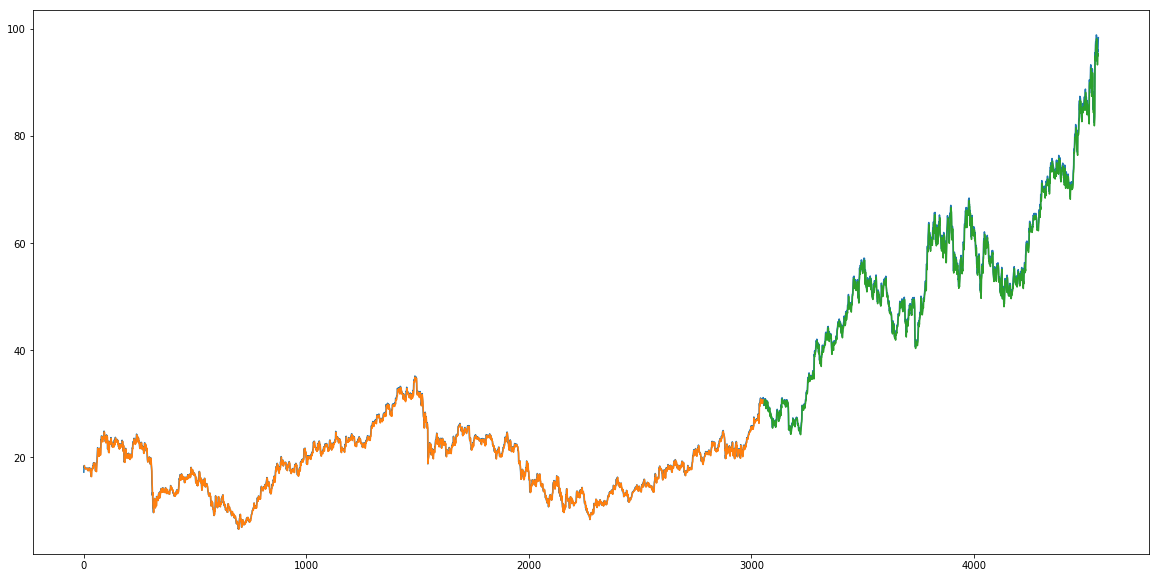

In [65]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(airbusset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(airbusset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(airbusset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(airbusset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()